In [1]:
import astropy.io.fits as fits
import treecorr
import numpy as np
import matplotlib.pyplot as plt
data_dir = '/home/b7009348/projects/WGL_Project/DES-data/'

In [6]:
with fits.open(data_dir+'y1_mcal_shapes_matched.fits') as hdu:
    data = hdu[1].data
    mcal_e1_m = data['e1']
    mcal_e2_m = data['e2']
    
with fits.open(data_dir+'y1_mcal_flags=0.fits') as hdu:
    data = hdu[1].data
    mcal_e1 = data['e1']
    mcal_e2 = data['e2']
    
del data

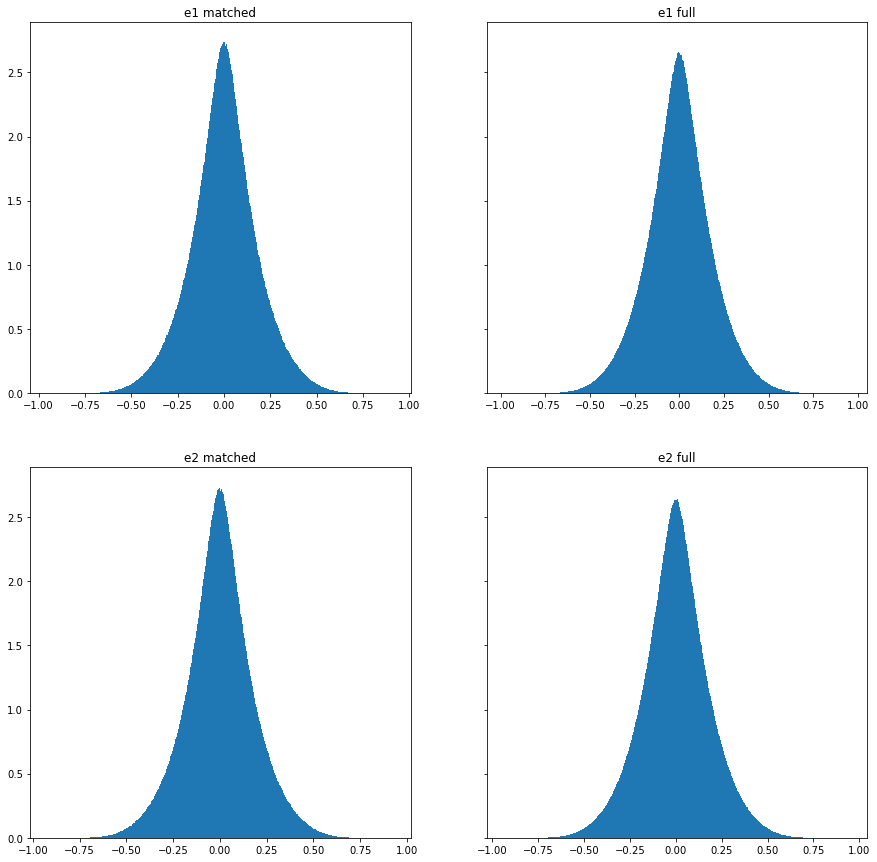

In [29]:
nbins = 1000

fig, axs = plt.subplots(2, 2, sharey = True, figsize=[15,15])

axs[0,0].hist(mcal_e1_m, bins=nbins, density=True)
axs[0,0].set_title('e1 matched')

axs[0,1].hist(mcal_e1, bins=nbins, density=True)
axs[0,1].set_title('e1 full')

axs[1,0].hist(mcal_e2_m, bins=nbins, density=True)
axs[1,0].set_title('e2 matched')

axs[1,1].hist(mcal_e2, bins=nbins, density=True)
axs[1,1].set_title('e2 full')

fig.savefig('mcal_ellipticity_dist.png', dpi=300)

In [27]:
print(np.mean(mcal_e1_m), np.mean(mcal_e1))
print(np.mean(mcal_e2_m), np.mean(mcal_e2))

0.00043030456621087897 0.00022704882595703027
0.00039288595406867805 0.0001836470648139128


In [ ]:
with fits.open(data_dir+'y1_im3_shapes_matched.fits') as hdu:
    data = hdu[1].data
    im3_e1_m = data['e1']
    im3_e2_m = data['e2']
    
with fits.open(data_dir+'y1_im3shape_flags=0.fits') as hdu:
    data = hdu[1].data
    mcal_e1_m = data['e1']
    mcal_e2_m = data['e2']

# Redshift distribution

- MOF and mcal redshifts may be different, could affect F
- z dist changed in matched catalogue, will mean matched cata gives different shears

In [3]:
with fits.open(data_dir+'y1_mcal_flags=0.fits') as hdu:
    data = hdu[1].data
    og_ids = data['coadd_objects_id']
    
del data

with fits.open(data_dir+'y1_mcal_shapes_matched.fits') as hdu:
    data = hdu[1].data
    match_ids = data['coadd_objects_id']
    
del data
    
with fits.open(data_dir+'y1a1-gold-mof-badregion_BPZ.fits') as hdu:
    data = hdu[1].data
    z_ids = data['coadd_objects_id']
    
    print('Getting og redshifts')
    
    matches, og_Indices, z_Indices = np.intersect1d(og_ids, z_ids, return_indices=True)
    del matches, og_Indices
    
    og_z = data['MEAN_Z'][z_Indices]
    
    print('Getting matched redshifts')
    
    matches, match_Indices, z_Indices = np.intersect1d(match_ids, z_ids, return_indices=True)
    del matches, match_Indices
    
    match_z = data['MEAN_Z'][z_Indices]

    
print(np.size(og_z), np.size(match_z))

Getting og redshifts
Getting matched redshifts
34839418 17865244


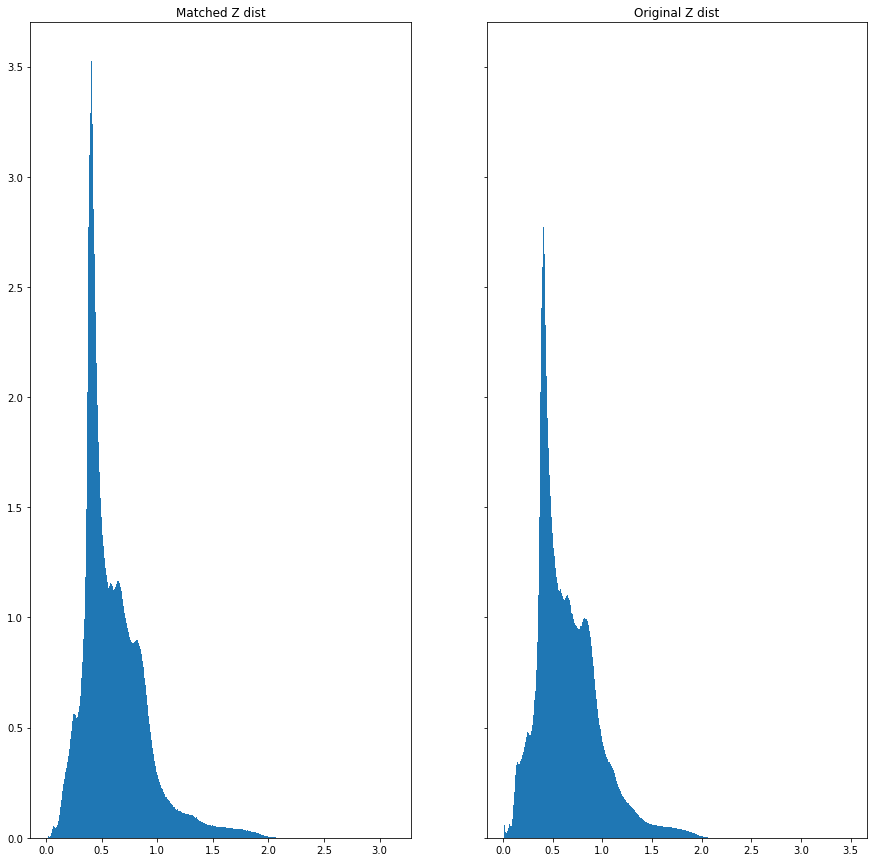

In [7]:
nbins = 1000

fig, axs = plt.subplots(1, 2, sharey = True, figsize=[15,15])

axs[0].hist(match_z, bins=nbins, density=True)
axs[0].set_title('Matched Z dist')

axs[1].hist(og_z, bins=nbins, density=True)
axs[1].set_title('Original Z dist')

fig.savefig('mcal_redshift_dist.png', dpi=300)